<a href="https://colab.research.google.com/github/stanley-varghese/stock-market-prediction/blob/main/LSTM_Arima(better).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Get the Dataset
df = pd.read_csv("MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [ ]:
# Print the shape of Dataframe and Check for Null Values
print('Dataframe Shape: ', df.shape)
print('Null Value Present: ', df.isnull().values.any())


Dataframe Shape:  (9083, 7)
Null Value Present:  False


<AxesSubplot:>

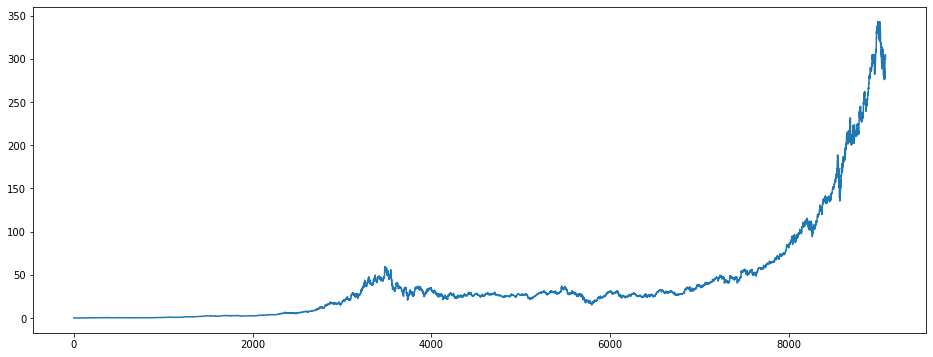

In [ ]:
# Plot the True Adj Close Value
df['Close'].plot(figsize=(16,6))

In [ ]:
# Set Target Variable
output_var = pd.DataFrame(df['Close'])

# Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
# Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.000000,0.000027,0.000000,1.000000
1,0.000025,0.000030,0.000025,0.297096
2,0.000035,0.000032,0.000036,0.127119
3,0.000040,0.000032,0.000030,0.063588
4,0.000033,0.000025,0.000025,0.044285


In [ ]:
# Splitting to Training set and Test set
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [ ]:
# Process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


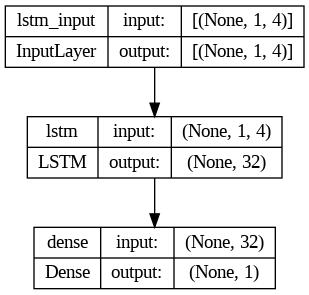

In [ ]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)


In [ ]:
# Model Training
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
1033/1033 [==============================] - 5s 3ms/step - loss: 269.7955
Epoch 2/100
1033/1033 [==============================] - 3s 3ms/step - loss: 215.3881
Epoch 3/100
1033/1033 [==============================] - 3s 3ms/step - loss: 192.6607
Epoch 4/100
1033/1033 [==============================] - 3s 3ms/step - loss: 125.4859
Epoch 5/100
1033/1033 [==============================] - 3s 3ms/step - loss: 69.6044
Epoch 6/100
1033/1033 [==============================] - 4s 3ms/step - loss: 29.4359
Epoch 7/100
1033/1033 [==============================] - 3s 3ms/step - loss: 8.7835
Epoch 8/100
1033/1033 [==============================] - 3s 3ms/step - loss: 2.2356
Epoch 9/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8395
Epoch 10/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.4679
Epoch 11/100
1033/1033 [==============================] - 4s 4ms/step - loss: 0.3085
Epoch 12/100
1033/1033 [==============================] - 4s 4ms

In [ ]:
# LSTM Prediction
y_pred = lstm.predict(X_test)


26/26 [==============================] - 0s 3ms/step


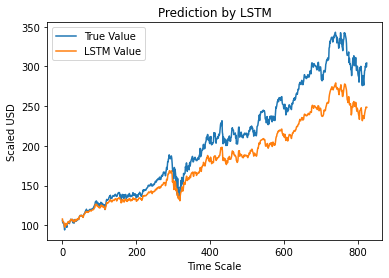

In [ ]:
# Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()